# EDA and Clustering on Online Retail Dataset

### 1) Importing Usefull

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings('ignore')

# import required libraries for clustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### 2) Loading Data and EDA
#### i) Loading dataset

In [2]:
#Load Dataset
data = pd.read_csv("OnlineRetail.csv")
print (data.columns)
data.head(10)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
#Basic info about data.
print('Shape: ',data.shape,'\n') # Shape
data.info() # information
data.describe() #Summary Stastics

Shape:  (541909, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### ii) Data Cleaning

In [4]:
# check missing values for each column 
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [5]:
# Calculating the Missing Values % contribution in DF

round(100*(data.isnull().sum())/len(data), 2)


InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
# change the invoice_date format - String to Timestamp format
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [7]:
# change description - UPPER case to LOWER case
data['Description'] = data.Description.str.lower()

#### iii) Remove rows with missing values


In [8]:
df_new = data.dropna(axis="rows")

In [9]:
df_new.reset_index(drop=True, inplace=True)

In [10]:
df_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [12]:
#Remove Quantity with negative values

df_new = df_new[df_new.Quantity > 0] 

In [13]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [14]:
# Adding More Columns For EDA
df_new['AmountSpent'] = df_new['Quantity'] * df_new['UnitPrice']

In [15]:
df_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'AmountSpent'],
      dtype='object')

In [16]:
# rearrange all the columns for easy reference
df_new = df_new[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity',
                 'UnitPrice','AmountSpent','CustomerID','Country']]

In [17]:
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.InvoiceDate.dt.hour)

In [18]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


#### iv) Exploratory Data Analysis

In [19]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


<b>The above result shows highest no. of invoices made for individual customers.</b>

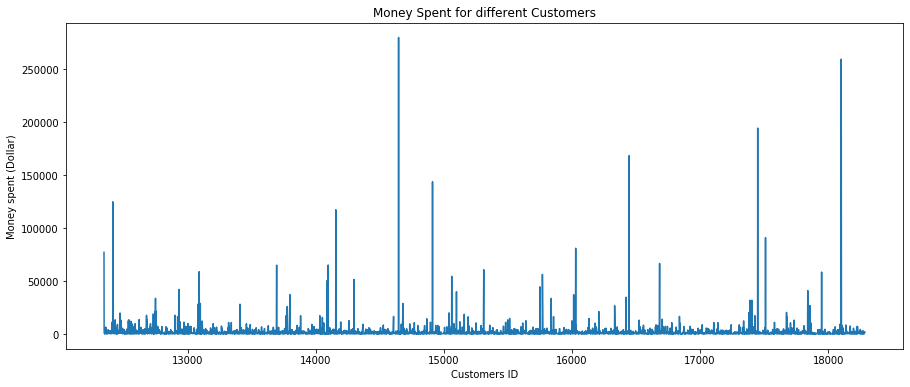

In [20]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

<b>The above graph shows money spent by customers. </b>

In [21]:
money_spent.sort_values(by = "AmountSpent", ascending = False).head()

,CustomerID,Country,AmountSpent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


<b>Above result shows top 5 customers who spent most online.</b>

In [22]:
df_new.year_month.unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112])

<b>This means that the transactions in dataset is from dec 2010 to dec 2011</b>

In [23]:
df_new.groupby(by='year_month', as_index=False)['AmountSpent'].sum()


,year_month,AmountSpent
0,201012,572713.890
1,201101,569445.040
2,201102,447137.350
3,201103,595500.760
4,201104,469200.361
5,201105,678594.560
6,201106,661213.690
7,201107,600091.011
8,201108,645343.900
9,201109,952838.382


<b>This above result shows the Amount spent month. </b>`

In [24]:
df_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

<b>This above result shows the Amount spent in days in weak. </b>`

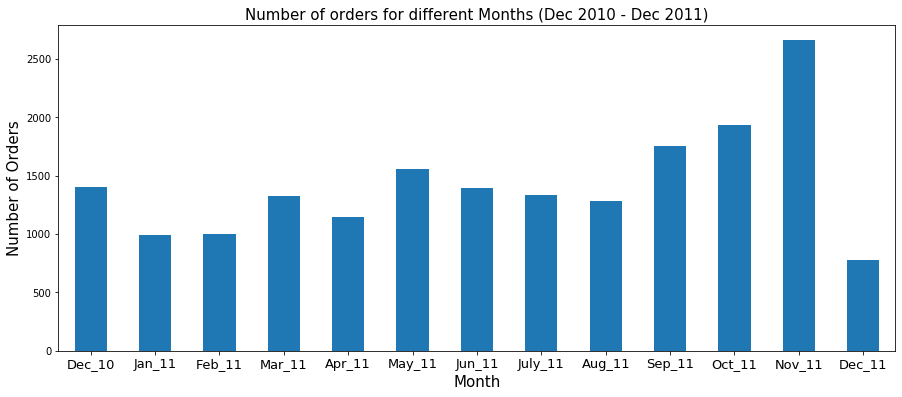

In [25]:
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

<b>This above result shows the number of orders for different Months. </b>`

### 3) Data Preparation for Clustering
We are going to analyse the Customers based on below 3 factors: <br>
R (Recency): Number of days since last purchase<br>
F (Frequency): Number of tracsactions<br>
M (Monetary): Total amount of transactions (revenue contributed)<br>

In [26]:
# Working for monetary value 
mon = df_new.groupby('CustomerID')['AmountSpent'].sum()
mon = mon.reset_index()
mon.columns = ['CustomerID','Monetary']
mon.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [27]:
# Working for Frequency

freq = df_new.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [28]:
# Working for Recency
# Compute the maximum date to know the last transaction date

max_date = max(df_new['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [29]:
# Compute the difference between max date and transaction date

df_new['Diff'] = max_date - df_new['InvoiceDate']
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country,Diff
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom,373 days 04:24:00
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom,373 days 04:24:00
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom,373 days 04:24:00
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom,373 days 04:24:00
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom,373 days 04:24:00


In [30]:
# Compute last transaction date to get the recency of customers

rec = df_new.groupby('CustomerID')['Diff'].min()
rec = rec.reset_index()
rec['Diff'] =  rec['Diff'].dt.days
rec.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [31]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(pd.merge(mon,freq,on='CustomerID'),rec,on='CustomerID')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()


,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

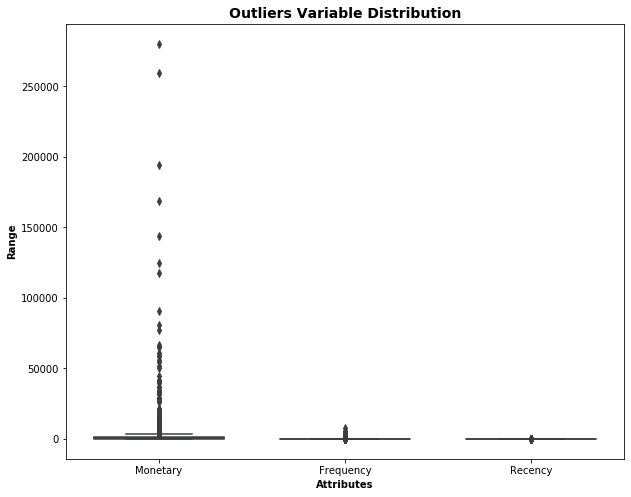

In [32]:
# Outlier Analysis of Monetary Frequency and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes],width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

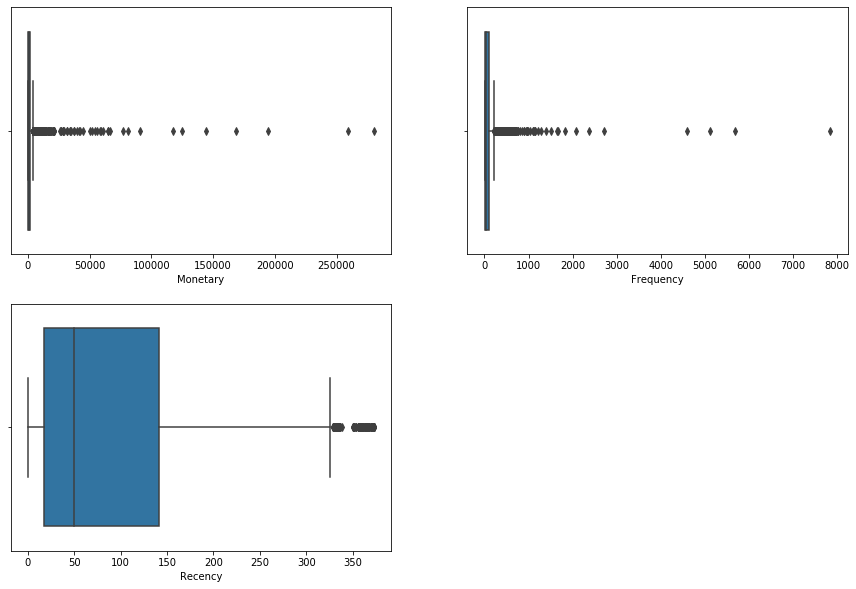

In [33]:
fig = plt.figure(figsize = (15,10))
axes = 220
for att in attributes:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = rfm, x = att)
plt.show()

No handles with labels found to put in legend.


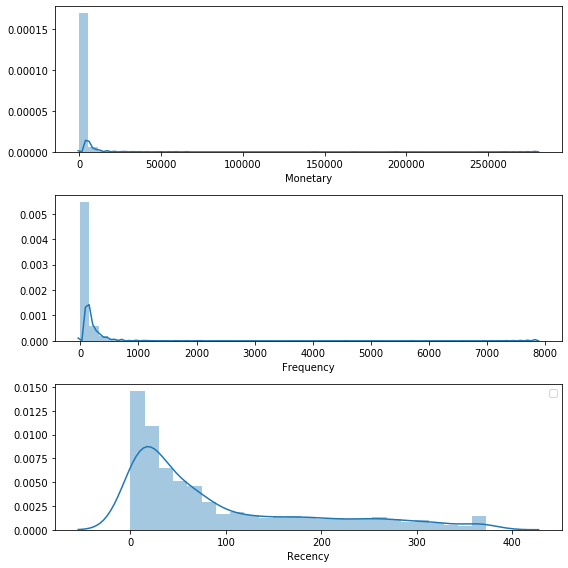

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(rfm["Monetary"], ax=ax1)
sns.distplot(rfm["Frequency"], ax=ax2)
sns.distplot(rfm["Recency"], ax=ax3)
plt.tight_layout()
plt.legend()

In [35]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

No handles with labels found to put in legend.


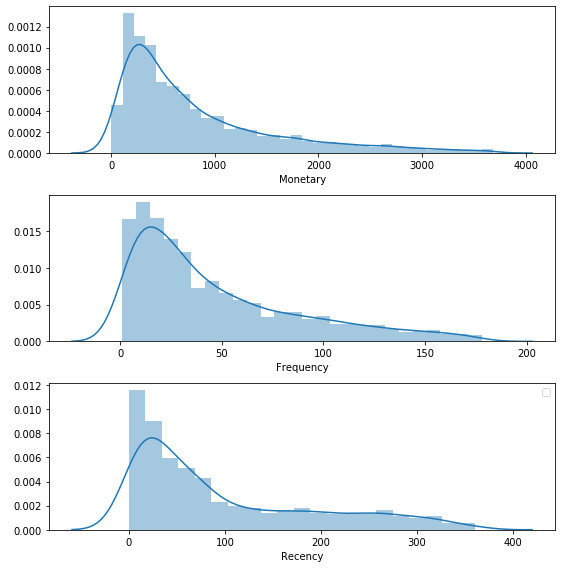

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(rfm["Monetary"], ax=ax1)
sns.distplot(rfm["Frequency"], ax=ax2)
sns.distplot(rfm["Recency"], ax=ax3)
plt.tight_layout()
plt.legend()

The above result shows positive skewness, which means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

In [37]:
rfm.head()

,CustomerID,Monetary,Frequency,Recency
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35
6,12353.0,89.00,4,203


In [38]:
# Rescaling the attributes

rfm_df = rfm[['Monetary', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3587, 3)

### 4) Model Building

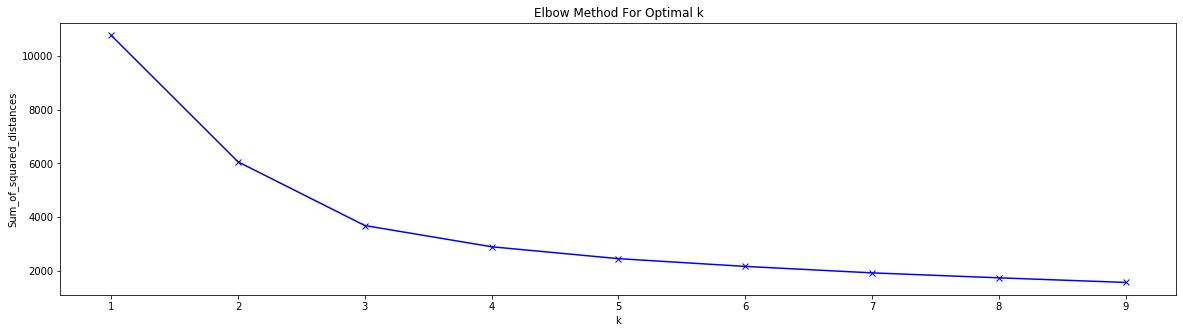

In [39]:
# USing Elbow method to find out the suitable number of clusters
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#### i) Kmeans Clustering 

K-Means


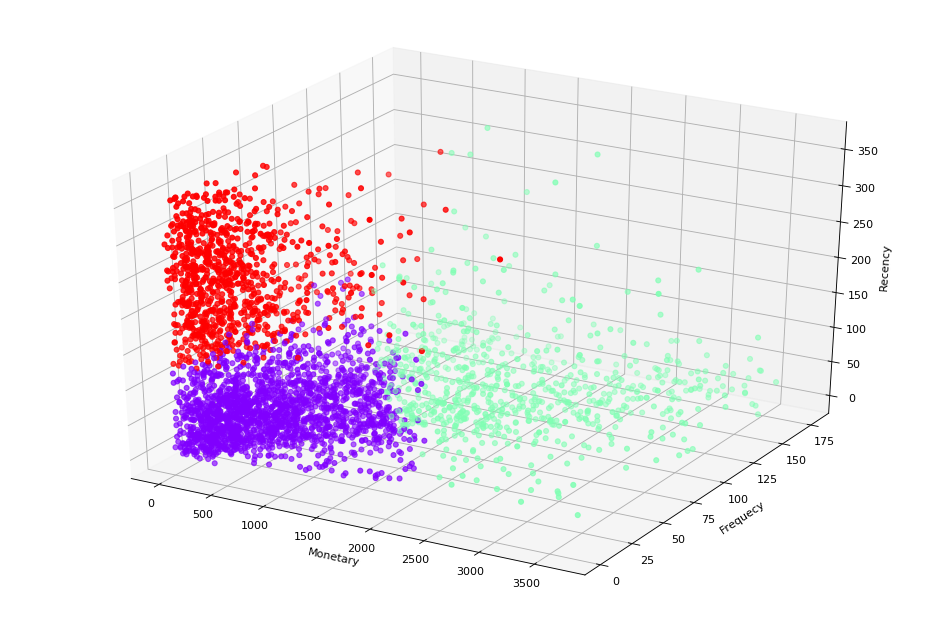

In [40]:
# 3 number of clusters are suitable
model = KMeans(n_clusters=3)
model.fit(rfm_df_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("K-Means")

In [49]:
rfm_kmeans = rfm.assign(Cluster=kmeans_labels)
grouped_kmeans = rfm_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15323.7,577.6,33.6,50.3
1,15206.5,1896.0,108.2,44.9
2,15334.0,374.3,21.6,240.0


#### ii) Mini Batch Kmeans 

Mini Batch K-Means


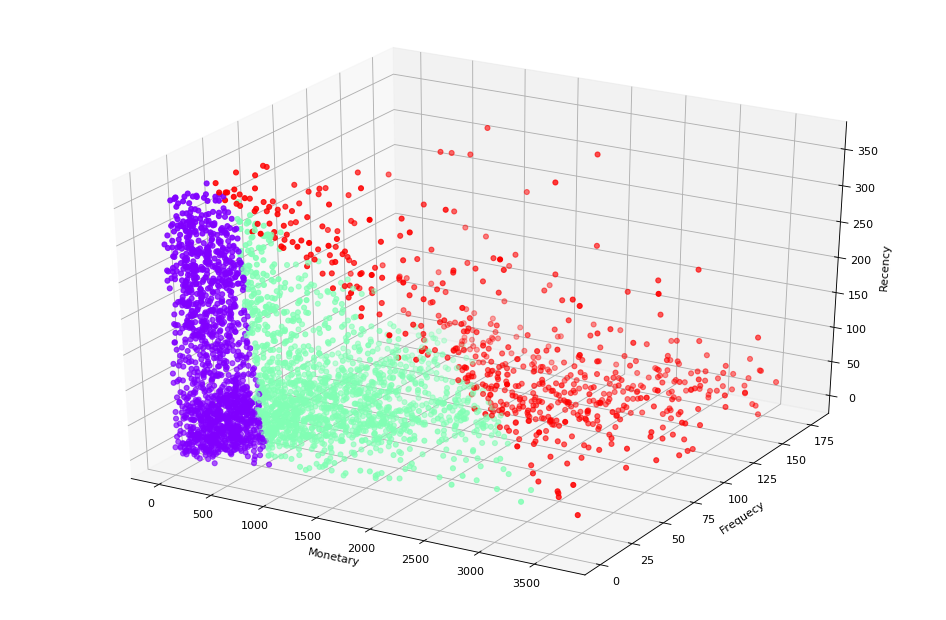

In [43]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
  

batch_size = 20
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, 
                      verbose = 0) 
  
mbk.fit(rfm_df_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(rfm_df_scaled, mbk_means_cluster_centers) 
  
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Mini Batch K-Means")

In [50]:
rfm_mbk_kmeans = rfm.assign(Cluster=mbk_means_labels)
grouped_mbk_kmeans = rfm_mbk_kmeans.groupby(['Cluster']).mean().round(1)
grouped_mbk_kmeans

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15378.1,253.5,14.0,131.2
1,15313.2,878.0,53.6,66.9
2,15089.4,1950.1,105.6,98.8


#### iii) Mean Shift Clustering

Mean Shift
number of estimated clusters: 3
bandwidth: 1.236440821877225


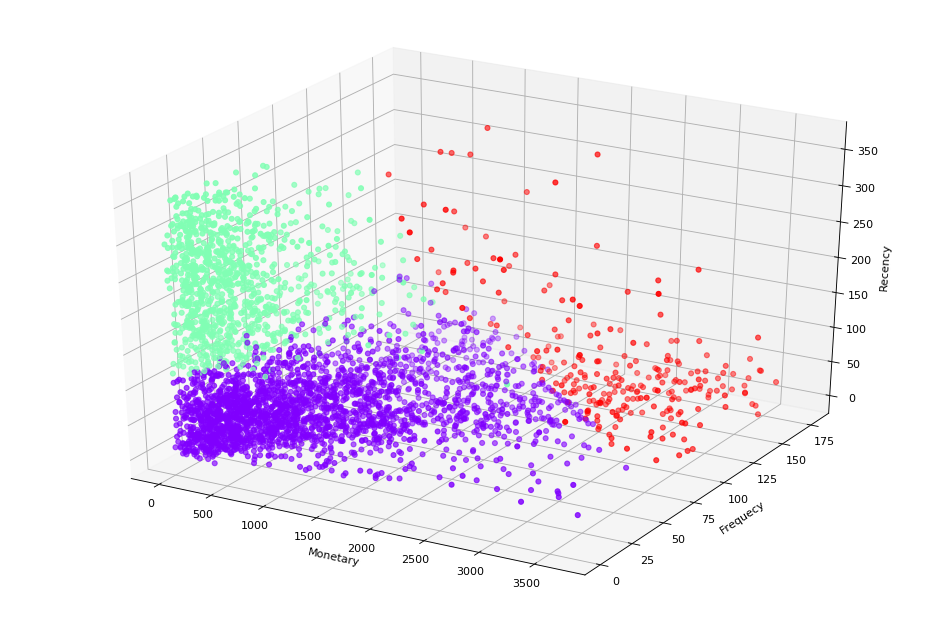

In [52]:

band = estimate_bandwidth(rfm_df_scaled, quantile=0.2)

analyzer = MeanShift(bandwidth=band)
analyzer.fit_predict(rfm_df_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Mean Shift")

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#print the labels of each data
print(f"number of estimated clusters: {n_clusters_}")
print(f"bandwidth: {band}")

In [53]:
rfm_meanshift = rfm.assign(Cluster=labels)
grouped_meanshift = rfm_meanshift.groupby(['Cluster']).mean().round(1)
grouped_meanshift

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15303.3,809.5,48.2,43.9
1,15357.2,379.8,22.1,232.0
2,15057.8,2543.2,130.1,73.3


#### iv) Hierarchical Agglomerative Clustering

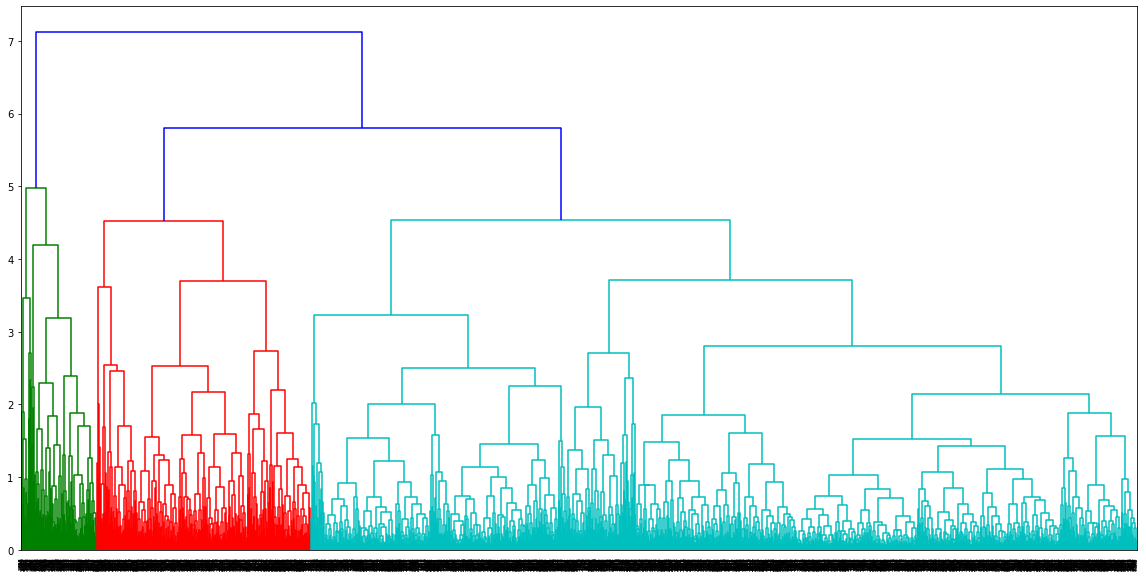

In [56]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(rfm_df_scaled, method='complete'))

Hierarchical Agglomerative Clustering


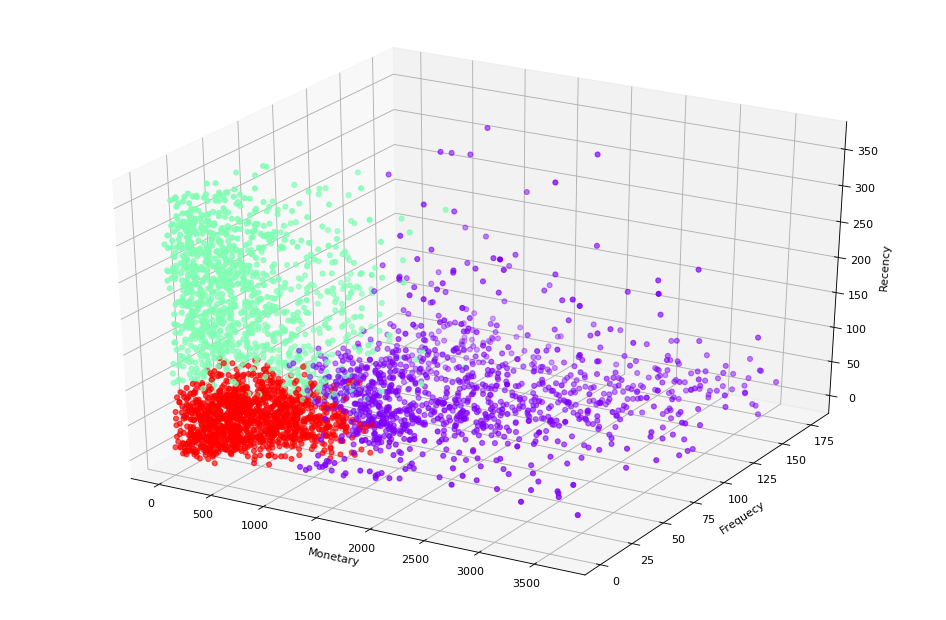

In [57]:

model = AgglomerativeClustering(n_clusters=3)
model.fit(rfm_df_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(rfm['Monetary'],rfm['Frequency'],rfm['Recency'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Monetary', linespacing=3.2)
yLabel = ax.set_ylabel('Frequecy', linespacing=3.1)
zLabel = ax.set_zlabel('Recency', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [58]:
rfm_hac = rfm.assign(Cluster=hac_labels)
grouped_hac = rfm_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,CustomerID,Monetary,Frequency,Recency
Cluster,,,,
0,15246.4,1623.6,92.8,44.6
1,15301.9,425.5,24.3,213.1
2,15348.9,431.3,25.5,40.9
